<a href="https://colab.research.google.com/github/Felipe-Oliveira11/PyCaret/blob/master/PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyCaret 
<hr>


Biblioteca PyCaret criada para atender o lifecycle de Machine learning, vou realizar alguns testes com esta biblioteca. 

<br>


<p align=center>
<img src="https://assets.st-note.com/production/uploads/images/23398116/rectangle_large_type_2_b9075ed34e9e3956219b8ccd295c5011.png?fit=bounds&format=jpeg&quality=45&width=960" width="60%"></p>


<br>


In [3]:
!pip install pycaret

In [4]:
import pandas as pd 
import numpy as np 

In [5]:
data = pd.read_csv('/content/drive/My Drive/Inteligência Artificial - Colab/PyCaret/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# PyCaret 
from pycaret.classification import *

In [7]:
# Instanciando classificador 
clf = setup(data, target='diagnosis', train_size=0.70, normalize=True, remove_outliers=True, multicollinearity_threshold=0.7, feature_selection=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3719
1,Target Type,Binary
2,Label Encoded,"B: 0, M: 1"
3,Original Data,"(569, 33)"
4,Missing Values,True
5,Numeric Features,31
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
# comparar modelos 
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.978700,0.996600,0.947300,0.992300,0.968200,0.952300
1,CatBoost Classifier,0.976200,0.994400,0.962600,0.972400,0.966000,0.947700
2,Ada Boost Classifier,0.973400,0.992100,0.946700,0.978500,0.960400,0.940500
3,K Neighbors Classifier,0.968100,0.984700,0.924700,0.985700,0.952400,0.928600
4,SVM - Linear Kernel,0.965600,0.000000,0.962600,0.946100,0.952400,0.925500
5,Light Gradient Boosting Machine,0.962900,0.990800,0.931900,0.965700,0.946200,0.918000
6,Gradient Boosting Classifier,0.960300,0.992600,0.932400,0.956400,0.942900,0.912500
7,Extreme Gradient Boosting,0.960300,0.992300,0.924700,0.963700,0.942600,0.912300
8,Random Forest Classifier,0.960200,0.988700,0.917000,0.970900,0.941600,0.911500
9,Extra Trees Classifier,0.957500,0.993800,0.917000,0.964700,0.937600,0.905500


In [9]:
# Regressão logística 

logistic_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9474,0.9754,0.8462,1.0000,0.9167,0.8786
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9211,0.9940,0.8571,0.9231,0.8889,0.8278
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9730,0.9968,0.9231,1.0000,0.9600,0.9396
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9459,1.0000,0.8462,1.0000,0.9167,0.8771


In [10]:
# hiperparâmetros do modelo
print(logistic_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3719, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
# Tunar modelo 

tuned_model = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9474,0.9846,0.8462,1.0000,0.9167,0.8786
3,0.9474,0.9969,0.9231,0.9231,0.9231,0.8831
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9474,0.9911,0.9286,0.9286,0.9286,0.8869
6,0.9737,1.0000,0.9286,1.0000,0.9630,0.9426
7,0.9730,1.0000,1.0000,0.9286,0.9630,0.9417
8,0.9730,1.0000,1.0000,0.9286,0.9630,0.9417
9,0.9730,1.0000,0.9231,1.0000,0.9600,0.9396


In [12]:
# Hiperparâmetros após tuning 

print(tuned_model)

LogisticRegression(C=7.415, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3719, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [15]:
# Tunar com otimização de métrica específica 

lr_tuned = tune_model('lr', optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9474,0.9846,0.8462,1.0000,0.9167,0.8786
3,0.9474,0.9969,0.9231,0.9231,0.9231,0.8831
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9474,0.9911,0.9286,0.9286,0.9286,0.8869
6,0.9737,1.0000,0.9286,1.0000,0.9630,0.9426
7,0.9730,1.0000,1.0000,0.9286,0.9630,0.9417
8,0.9730,1.0000,1.0000,0.9286,0.9630,0.9417
9,0.9730,1.0000,0.9231,1.0000,0.9600,0.9396


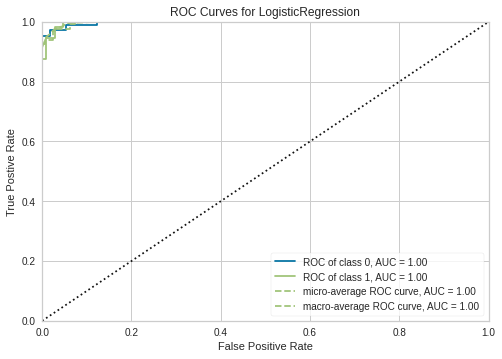

In [16]:
# plot ROC curve 

plot_model(lr_tuned, plot='auc')

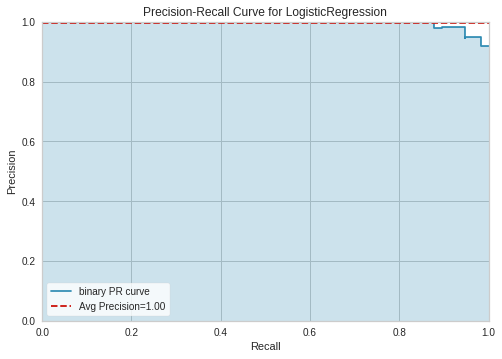

In [17]:
# Precision-Recall curve 

plot_model(lr_tuned, plot='pr')

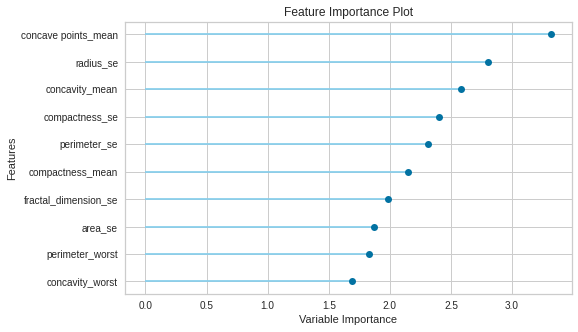

In [18]:
# Feature importance 

plot_model(lr_tuned, plot='feature')

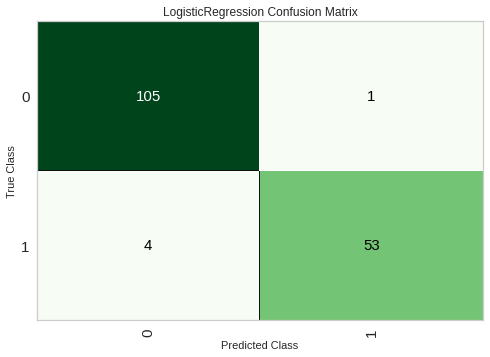

In [19]:
# Matrix de confusão 

plot_model(lr_tuned, plot='confusion_matrix')

In [20]:
# Avaliar modelo 

evaluate_model(lr_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
# Predição no teste 

predict_model(lr_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9693,0.9975,0.9298,0.9815,0.955,0.9317


,id,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Label,Score
0,-0.236226,0.210940,-0.609610,0.078528,1.411902,1.147683,1.006917,1.039777,1.260968,0.692130,0.077338,-0.486160,0.060859,0.018546,-0.018660,0.008487,-0.059143,0.148237,-0.547553,0.033701,0.526157,0.275658,0.590915,0.376926,2.429885,1.232425,0.950924,1.341368,1.106957,1.249858,1,1,1.0000
1,-0.236210,-0.550218,-1.396158,-0.566230,0.728714,-0.175320,-0.756428,-0.518437,0.249657,0.271101,-0.738704,-0.726742,-0.442092,-0.552179,-0.089330,-0.051314,-0.719962,-0.600522,0.735879,0.131668,-0.606584,-1.281128,-0.473035,-0.589574,0.452886,0.026940,-0.830156,-0.498461,0.919295,0.469050,0,0,0.0000
2,-0.236052,-0.047513,-0.521181,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,0.071563,-0.738535,-0.150024,-0.101144,-0.230002,0.073319,-0.023333,0.263406,0.009408,-0.416040,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489,1,1,0.5893
3,-0.235854,-0.428092,-0.497911,-0.460714,-0.749392,-0.948351,-0.742492,-0.675780,-0.046070,-0.643253,-0.851673,-0.996897,-0.866333,-0.594422,-1.051036,-0.946721,-0.641048,-0.796147,-0.540288,-0.815852,-0.399502,-0.574386,-0.465887,-0.434351,-0.432599,-0.652457,-0.400538,-0.245091,0.597356,-0.589947,0,0,0.0016
4,-0.236285,-0.672344,0.537634,-0.645580,-0.710963,-1.036286,-0.906837,-0.974217,-1.155957,-0.555362,0.003710,-0.012434,-0.114381,-0.261096,-0.394676,-0.878591,-0.670227,-0.705796,0.425918,-0.766301,-0.681134,0.006966,-0.723236,-0.640026,-1.046301,-1.069447,-1.040863,-1.179395,-0.756726,-1.014986,0,0,0.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,-0.235964,-0.518977,-0.062749,-0.541771,-0.941539,-1.181075,-1.017496,-1.041668,-0.995315,-0.474559,-0.798256,0.571784,-0.825245,-0.596182,0.280018,-0.952701,-0.825269,-0.855516,-0.139519,-0.594953,-0.604513,0.453158,-0.677068,-0.591156,-0.445749,-1.041647,-1.132208,-1.138587,-0.560975,-0.658108,0,0,0.0000
159,-0.235995,-0.305966,-1.268170,-0.353491,-0.913784,-1.269578,-1.057635,-1.034085,-1.309296,-1.079875,-0.027690,-0.704607,-0.148043,-0.161208,-0.964365,-1.160666,-0.963633,-1.131435,-0.765494,-0.575662,-0.318739,-1.347894,-0.396188,-0.365968,-1.348769,-1.245530,-1.218324,-1.207259,-1.284123,-1.005565,0,0,0.0001
160,-0.170994,2.057032,-0.974959,2.079354,0.266139,0.893733,1.310748,1.975325,0.589194,-0.137169,-0.230167,0.167186,-0.227248,-0.028098,-0.871695,0.071084,0.082106,0.265028,-0.459166,0.216396,1.329638,-0.624868,1.335561,1.150408,-0.577257,0.189156,0.624693,1.248486,-0.276245,0.150409,1,1,1.0000
161,-0.171015,-0.445133,-0.051114,-0.480907,-0.623429,-0.010252,0.178289,-0.129206,-1.017221,-0.135751,-0.162314,0.473810,0.171251,-0.282658,0.937378,0.942961,1.021776,1.275595,0.708031,0.155119,-0.600372,-0.528790,-0.543330,-0.585707,-0.998082,-0.343929,-0.160182,-0.334319,-1.261474,-0.668637,0,0,0.0001


In [22]:
# Finalizar modelo 

model_finalized = finalize_model(lr_tuned)

In [25]:
# métricas modelo final 

print(predict_model(model_finalized))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9816,0.9997,0.9649,0.9821,0.9735,0.9594


           id  radius_mean  texture_mean  ...  diagnosis  Label   Score
0   -0.236226     0.210940     -0.609610  ...          1      1  1.0000
1   -0.236210    -0.550218     -1.396158  ...          0      0  0.0000
2   -0.236052    -0.047513     -0.521181  ...          1      1  0.8193
3   -0.235854    -0.428092     -0.497911  ...          0      0  0.0038
4   -0.236285    -0.672344      0.537634  ...          0      0  0.0005
..        ...          ...           ...  ...        ...    ...     ...
158 -0.235964    -0.518977     -0.062749  ...          0      0  0.0000
159 -0.235995    -0.305966     -1.268170  ...          0      0  0.0000
160 -0.170994     2.057032     -0.974959  ...          1      1  1.0000
161 -0.171015    -0.445133     -0.051114  ...          0      0  0.0002
162 -0.236002    -0.473535      0.139706  ...          0      0  0.0001

[163 rows x 33 columns]


In [26]:
# Salvar modelo 
save_model(model_finalized,'Final Logistic Regression')

Transformation Pipeline and Model Succesfully Saved


<hr>
<br>
<hr>